# 1. Предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [481]:
df = pd.read_csv('air_data.csv', sep=';', low_memory=False)
df.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [482]:
df.shape

(50000, 9)

In [483]:
# Меняем регистр для привычного вида
df.columns = df.columns.str.lower()
df.columns

Index(['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount',
       'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag',
       'sale_type'],
      dtype='object')

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [485]:
# переведем issue_date и flight_date_loc в формат 'datetime64[ns]
df = df.astype({'issue_date': 'datetime64[ns]', 'flight_date_loc': 'datetime64[ns]'})

In [486]:
df.isnull().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [487]:
unique_ffp = df['ffp_flag'].unique()
num_size = round(30602/df.shape[0]*100, 2)
print('Доля пропусков в столбце ffp_flag:', num_size)
print('Уникальные значения в столбце ffp_flag:', unique_ffp)

Доля пропусков в столбце ffp_flag: 61.2
Уникальные значения в столбце ffp_flag: [nan 'FFP']


Мы видим, что в колонке ffp_flag доля пропусков составляет около 60%. Это говорит о том, что мы имеем право ее извлечь из исследования. Однако перед этим уточним, что это за признак. FFP_FLAG это признак, отвечающий за наличие программы лояльности. В этом столбце мы видим только два значения: FFP и nan. Скорее всего значение FFP говорит о наличии этой программа, а значение nan говорит о ее отсутствии. Поэтому лучшим решением будет заполнить эти пропуски. Превратим этот столбец в бинарный признак 0 и 1. Наличие программа (FFP) это 1, а ее отсутствие - 0.

In [488]:
ffp_dict = {'FFP': 1, np.nan: 0}
df['ffp_flag'] = df['ffp_flag'].map(ffp_dict)
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE


In [489]:
# Другие объекты наблюдения с пропусками просто удалим. Их малое количество не повлияет на репрезентативность
df.dropna(inplace=True)

In [490]:
# Посмотрим данные по колонкам
for i in df.columns.values:
    print(i)
    print(df[i].unique())
    print()

issue_date
<DatetimeArray>
['2021-12-07 00:00:00', '2021-12-31 00:00:00', '2021-11-28 00:00:00',
 '2021-12-08 00:00:00', '2021-11-29 00:00:00', '2021-12-03 00:00:00',
 '2021-12-02 00:00:00', '2021-11-25 00:00:00', '2021-12-06 00:00:00',
 '2021-12-05 00:00:00',
 ...
 '2022-09-24 00:00:00', '2022-09-18 00:00:00', '2022-04-10 00:00:00',
 '2022-01-27 00:00:00', '2022-07-16 00:00:00', '2022-07-23 00:00:00',
 '2022-04-23 00:00:00', '2022-09-11 00:00:00', '2022-06-28 00:00:00',
 '2022-07-05 00:00:00']
Length: 365, dtype: datetime64[ns]

flight_date_loc
<DatetimeArray>
['2022-01-11 00:00:00', '2022-01-03 00:00:00', '2022-01-04 00:00:00',
 '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-14 00:00:00',
 '2022-01-06 00:00:00', '2022-01-07 00:00:00', '2022-01-10 00:00:00',
 '2022-01-24 00:00:00',
 ...
 '2021-12-02 00:00:00', '2022-05-18 00:00:00', '2022-05-07 00:00:00',
 '2022-05-13 00:00:00', '2022-05-08 00:00:00', '2022-05-20 00:00:00',
 '2022-05-09 00:00:00', '2022-05-21 00:00:00', '2022-

Никаких аномалий нет. Можно продолжать анализ.

In [491]:
# Создаем столбец с суммами по группам
df['route_mean'] = df.groupby(['orig_city_code', 'dest_city_code'])['revenue_amount'].transform('mean')

# Приводим типы к одинаковым для избежания системных ошибок
df['route_mean'] = df['route_mean'].astype(float)
df['revenue_amount'] = df['revenue_amount'].astype(float)

# Теперь заполняем
df['revenue_amount_filled'] = df['revenue_amount']
df.loc[df['revenue_amount'] == 0, 'revenue_amount_filled'] = df.loc[df['revenue_amount'] == 0, 'route_mean']

df.drop(columns=['route_mean', 'revenue_amount'], inplace=True)
df.rename({'revenue_amount_filled': 'revenue_amount'},  axis="columns", inplace=True)

In [492]:
df

,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,MOW,OMS,ВВЛ,0,ONLINE,480.0
49996,2022-06-06,2022-06-20,AD,LED,MOW,ВВЛ,0,OFFLINE,270.0
49997,2022-06-26,2022-06-29,AD,MOW,KZN,ВВЛ,1,ONLINE,230.0
49998,2022-06-26,2022-06-28,AD,KZN,MOW,ВВЛ,0,OFFLINE,270.0


In [493]:
# посмотрим количество дубликатов
num_dupl = df.duplicated().sum()
print("Количество дублей:", num_dupl)

Количество дублей: 169


In [494]:
# удалим дубли
df = df.drop_duplicates().reset_index(drop=True)

После проведенных преобразований конечное количество наблюдаемых объектов сократилось с 50_000 до 49_828. Мы удалили дубликаты и пару объектов с пропущенными значениями. Объекты с нулевой выручкой заменили средними значениями по каждой группе направлений.

# 2. Исследовательский анализ данных

## 2.1 Динамика продаж

### 2.1.1 Общая динамика продаж

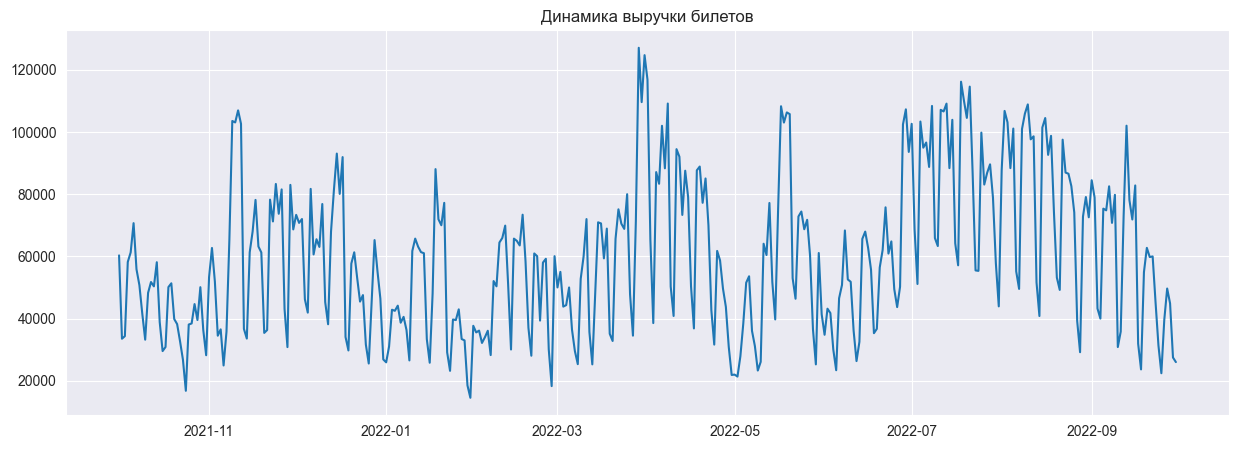

In [495]:
# построим первичный график по динамике продаж
gen_dyn_df = df.groupby('issue_date').agg({'revenue_amount': 'sum'}).reset_index()

plt.figure(figsize = (15,5))


plt.plot(gen_dyn_df['issue_date'], gen_dyn_df['revenue_amount'])

plt.title('Динамика выручки билетов')


plt.show()

На основе графика выше можно сделать несколько выводов:<br>
<ol>
    <li> <i>Сезонность</i>. На протяжении всего наблюдаемого периода мы наблюдаем цикличность в продаже билетов.
    <li> <i>Колебания</i>. Выручка от билетов демонстрирует значительные колебания на протяжении всего периода
    <li> <i>Пики</i>. Наблюдаются несколько пиков (сентябрь 2021, апрель 2022, июнь 2022 и т.д.)
</ol>

### 2.1.2 Динамика продаж за определенный период по полям программы лояльности (FFP_FLAG), типу перелета (ROUTE_FLIGHT_TYPE), способу покупки (SALE_TYPE)

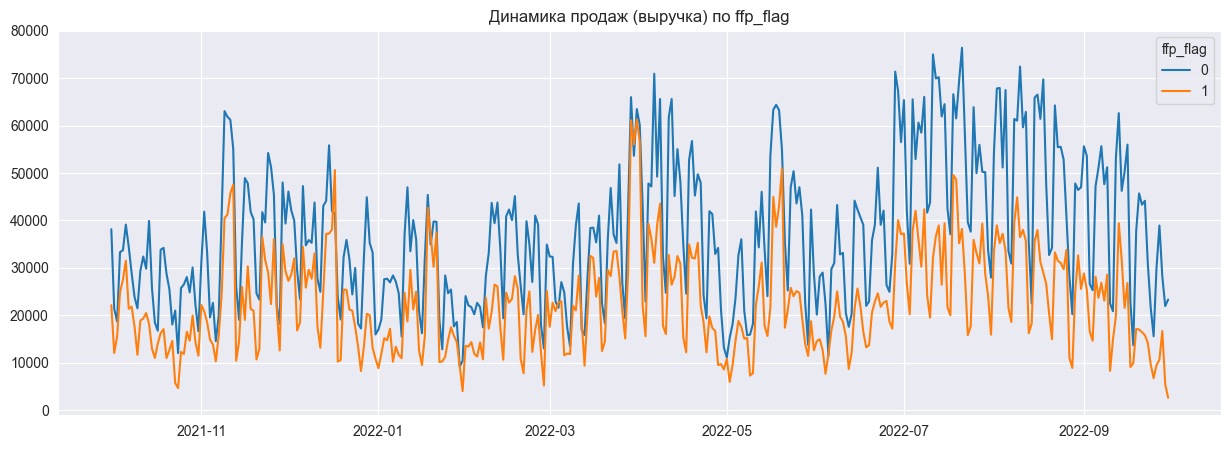

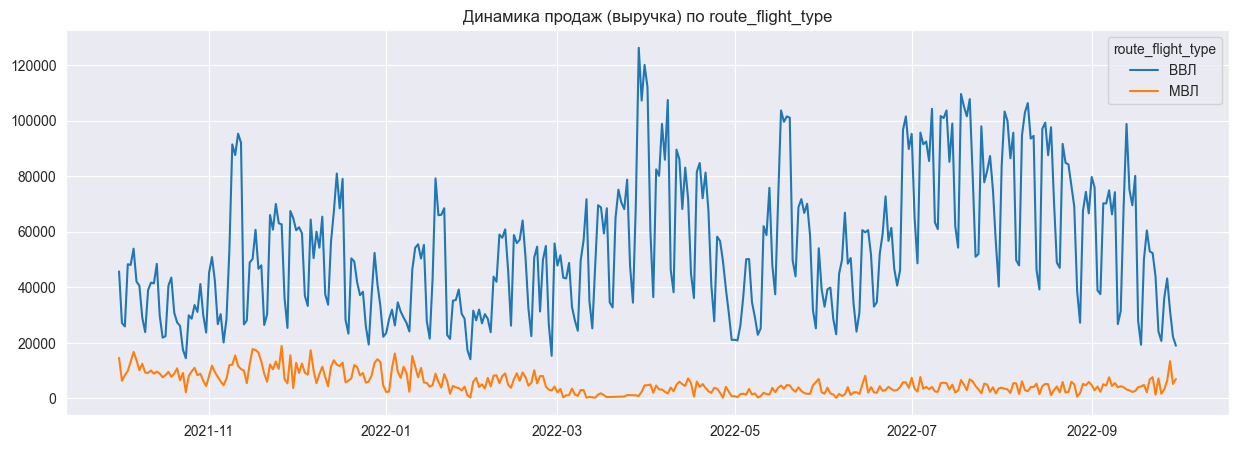

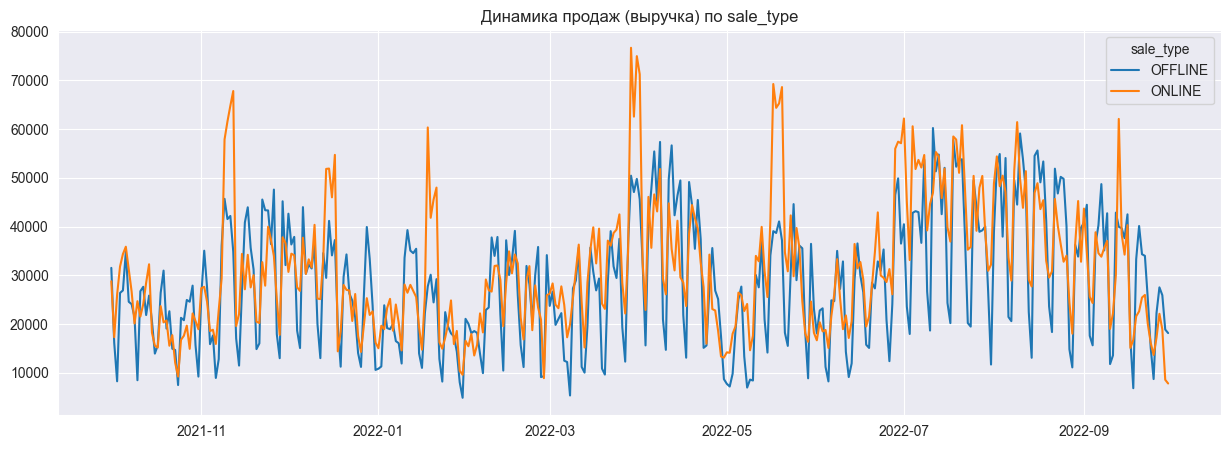

In [496]:
ness_col = ['ffp_flag', 'route_flight_type', 'sale_type']

for i in ness_col:
    var_df = df.groupby(['issue_date', i]).agg({'revenue_amount': 'sum'}).reset_index()

    plt.figure(figsize = (15,5))


    sns.lineplot(data=var_df, x='issue_date', y='revenue_amount', hue=i)

    plt.title(f'Динамика продаж (выручка) по {i}')

    plt.xlabel(None)
    plt.ylabel(None)

plt.show()


На основе построенных графиков можно сделать следующие выводы:
<ol>
    <li> <i>Доминирование внутренних рейсов</i>: Основной вклад в выручку обеспечивают внутренние перелеты и оффлайн-продажи, что может указывать на предпочтения клиентов или ограничения онлайн-каналов.
    <li> <i>Низкая роль программы лояльности</i>: Клиенты с программой лояльности приносят значительно меньшую выручку, что может свидетельствовать о недостаточной эффективности или охвате программы.
    <li> <i>Сезонность и спад</i>: Наблюдаются пики в начале и середине 2022 года, возможно, связанные с сезонным спросом, с общим снижением выручки к сентябрю 2022 года, что может быть связано с внешними факторами (например, экономическими или эпидемиологическими).
</ol>


### 2.1.3. Анализ продаж по типу пассажира (PAX_TYPE), способу покупки (SALE_TYPE), программе лояльности (FFP_FLAG), типу перелета (ROUTE_FLIGHT_TYPE)

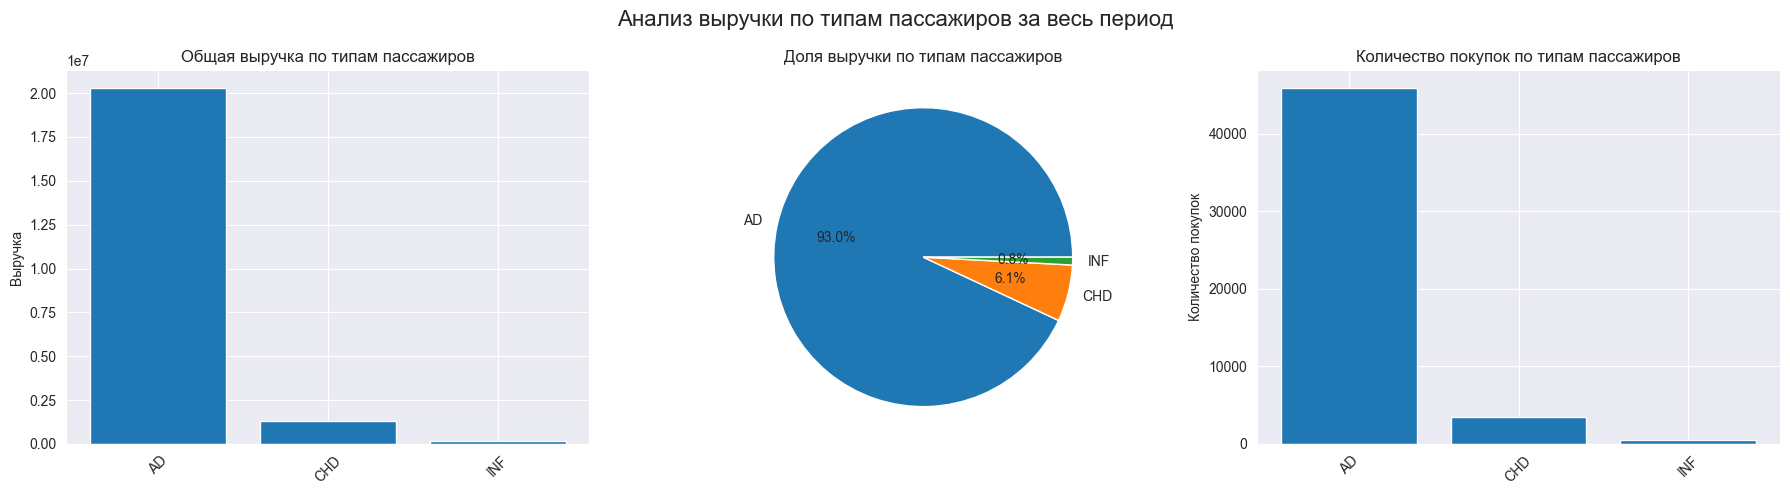

In [497]:
# Группировка данных по типу пассажира
pax_revenue = df.groupby('pax_type')['revenue_amount'].agg(['sum', 'count', 'mean']).round(2)
pax_revenue.columns = ['Total_Revenue', 'Number_of_Bookings', 'Average_Revenue_per_Booking']

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Общая выручка по типам пассажиров
axes[0].bar(pax_revenue.index, pax_revenue['Total_Revenue'])
axes[0].set_title('Общая выручка по типам пассажиров')
axes[0].set_ylabel('Выручка')
axes[0].tick_params(axis='x', rotation=45)

# 2. Доля выручки по типам пассажиров
axes[1].pie(pax_revenue['Total_Revenue'], labels=pax_revenue.index, autopct='%1.1f%%')
axes[1].set_title('Доля выручки по типам пассажиров')

# 3. Количество покупок по типам пассажиров
axes[2].bar(pax_revenue.index, pax_revenue['Number_of_Bookings'])
axes[2].set_title('Количество покупок по типам пассажиров')
axes[2].set_ylabel('Количество покупок')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Анализ выручки по типам пассажиров за весь период', fontsize=16)

plt.tight_layout()
plt.show()

На основе этих графиков мы можем утверждать, что большую часть выручки приносят билеты для взрослых. Также доминирующее билетов куплено для взрослых.

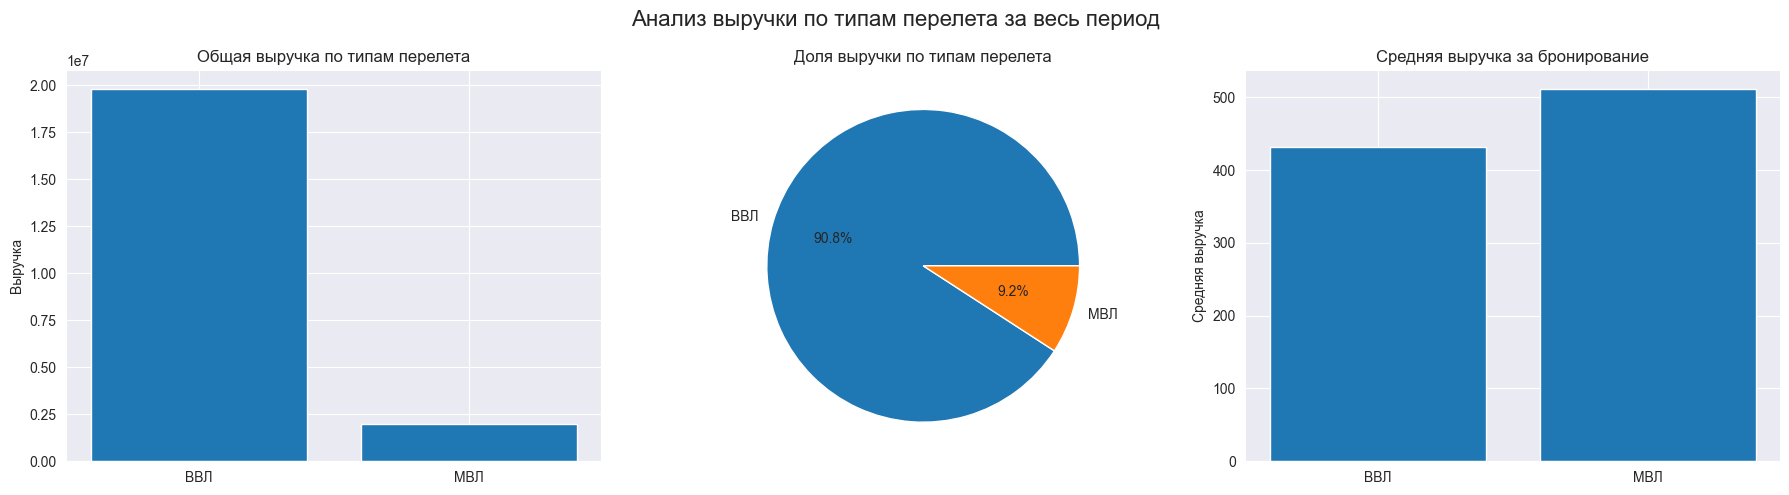

In [498]:
# Группировка данных по типу перелета
route_revenue = df.groupby('route_flight_type')['revenue_amount'].agg(['sum', 'count', 'mean']).round(2)
route_revenue_date = df.groupby(['issue_date', 'route_flight_type'])['revenue_amount'].agg(['sum']).round(2).reset_index()
route_revenue.columns = ['Total_Revenue', 'Number_of_Bookings', 'Average_Revenue_per_Booking']

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Общая выручка по типам перелета
axes[0].bar(route_revenue.index, route_revenue['Total_Revenue'])
axes[0].set_title('Общая выручка по типам перелета')
axes[0].set_ylabel('Выручка')

# 2. Доля выручки по типам перелета
axes[1].pie(route_revenue['Total_Revenue'], labels=route_revenue.index, autopct='%1.1f%%')
axes[1].set_title('Доля выручки по типам перелета')

# 3. Средняя выручка за бронирование
axes[2].bar(route_revenue.index, route_revenue['Average_Revenue_per_Booking'])
axes[2].set_title('Средняя выручка за бронирование')
axes[2].set_ylabel('Средняя выручка')

fig.suptitle('Анализ выручки по типам перелета за весь период', fontsize=16)

plt.tight_layout()
plt.show()

На основе этих графиков мы можем утверждать, что перелеты на внутренних рейсах приносят большую прибыль, чем на международных рейсах почти в 9 раз. Средняя выручка за один биллет примерно одинакова и составляет около 450 долларов

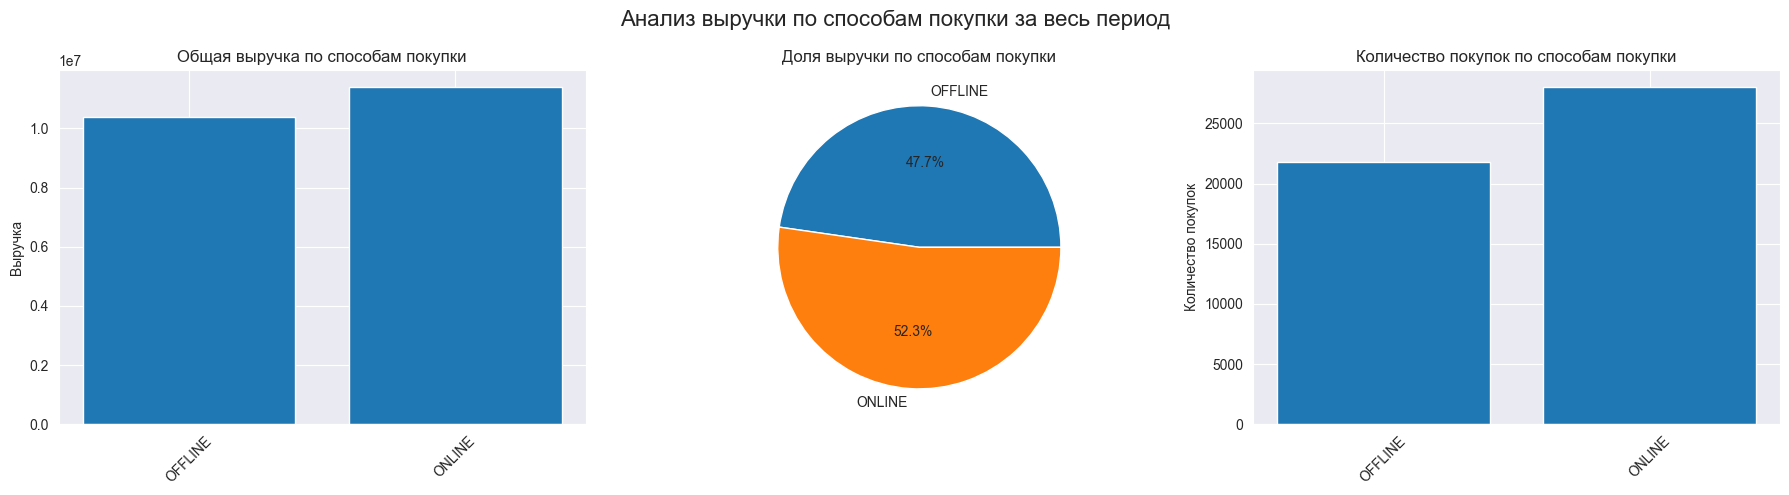

In [499]:
# Группировка данных по способу покупки
sale_revenue = df.groupby('sale_type')['revenue_amount'].agg(['sum', 'count', 'mean']).round(2)
sale_revenue.columns = ['Total_Revenue', 'Number_of_Bookings', 'Average_Revenue_per_Booking']


# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Общая выручка по способам покупки
axes[0].bar(sale_revenue.index, sale_revenue['Total_Revenue'])
axes[0].set_title('Общая выручка по способам покупки')
axes[0].set_ylabel('Выручка')
axes[0].tick_params(axis='x', rotation=45)

# 2. Доля выручки по способам покупки
axes[1].pie(sale_revenue['Total_Revenue'], labels=sale_revenue.index, autopct='%1.1f%%')
axes[1].set_title('Доля выручки по способам покупки')

# 3. Количество покупок по способам покупки
axes[2].bar(sale_revenue.index, sale_revenue['Number_of_Bookings'])
axes[2].set_title('Количество покупок по способам покупки')
axes[2].set_ylabel('Количество покупок')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Анализ выручки по способам покупки за весь период', fontsize=16)

plt.tight_layout()
plt.show()

На основе этих графиков мы можем утверждать, что выручка по обоим способам покупки примерно одинакова. Однако количество купленных билетов оффлайн больше на 30%, чем онлайн.

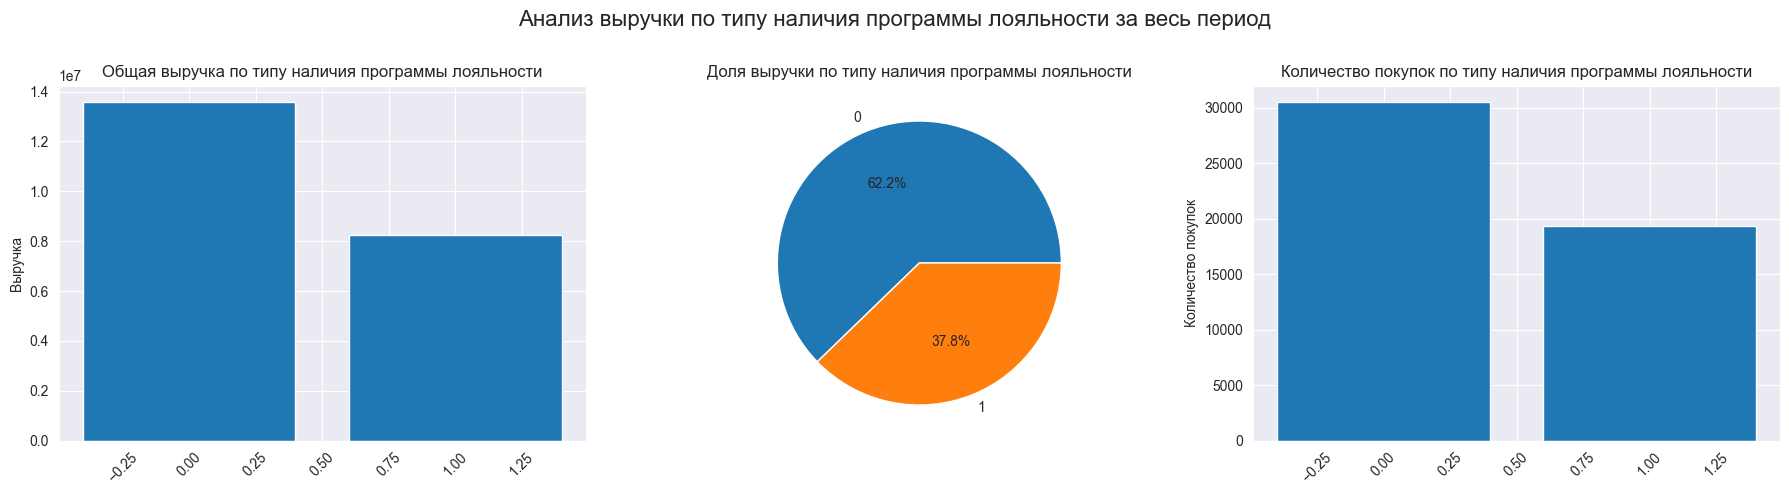

In [500]:
# Группировка данных по типу пассажира
pax_revenue = df.groupby('ffp_flag')['revenue_amount'].agg(['sum', 'count', 'mean']).round(2)
pax_revenue.columns = ['Total_Revenue', 'Number_of_Bookings', 'Average_Revenue_per_Booking']

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Общая выручка по типам пассажиров
axes[0].bar(pax_revenue.index, pax_revenue['Total_Revenue'])
axes[0].set_title('Общая выручка по типу наличия программы лояльности')
axes[0].set_ylabel('Выручка')
axes[0].tick_params(axis='x', rotation=45)

# 2. Доля выручки по типам пассажиров
axes[1].pie(pax_revenue['Total_Revenue'], labels=pax_revenue.index, autopct='%1.1f%%')
axes[1].set_title('Доля выручки по типу наличия программы лояльности')

# 3. Количество покупок по типам пассажиров
axes[2].bar(pax_revenue.index, pax_revenue['Number_of_Bookings'])
axes[2].set_title('Количество покупок по типу наличия программы лояльности')
axes[2].set_ylabel('Количество покупок')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Анализ выручки по типу наличия программы лояльности за весь период', fontsize=16)

plt.tight_layout()
plt.show()

На основе этих графиков мы можем утверждать, что общая выручка по наличию программы лояльности распределяется следующим образом: 62,2% приходится на клиентов без программы лояльности и 37,8% — с программой лояльности. Выручка по билетам без программы лояльности превышает другую категорию почти в 1.8 раз.

## 2.2 Исключение выбросов

In [501]:
df['revenue_amount'].describe()

count    49828.000000
mean       437.488346
std        214.031062
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

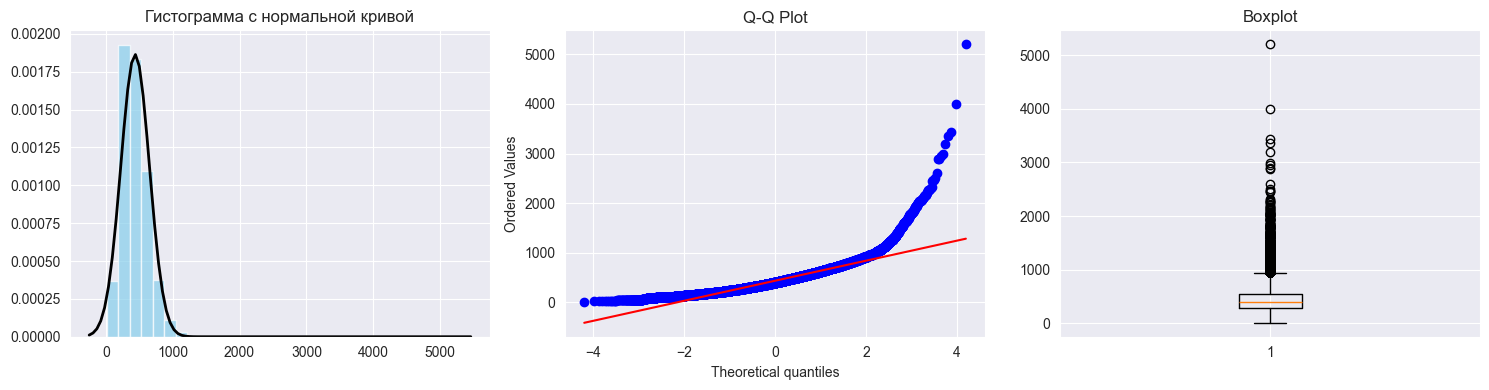

In [504]:
from scipy.stats import norm, probplot

def plot_normality_check(data, column):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Гистограмма с нормальной кривой
    axes[0].hist(data[column], bins=30, density=True, alpha=0.7, color='skyblue')
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, data[column].mean(), data[column].std())
    axes[0].plot(x, p, 'k', linewidth=2)
    axes[0].set_title('Гистограмма с нормальной кривой')

    # Q-Q plot
    probplot(data[column], dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot')

    # Boxplot
    axes[2].boxplot(data[column])
    axes[2].set_title('Boxplot')

    plt.tight_layout()
    plt.show()

plot_normality_check(df, 'revenue_amount')

In [507]:
from scipy.stats import shapiro

def normality_on_subsamples(data, column, n_subsamples=5, subsample_size=5000):
    """
    Проверка нормальности на нескольких подвыборках
    """
    print(f"ПРОВЕРКА НОРМАЛЬНОСТИ НА ПОДВЫБОРКАХ")
    print("=" * 40)

    n_total = len(data[column])
    results = []

    for i in range(n_subsamples):
        # Берем случайную подвыборку
        subsample = data[column].sample(n=min(subsample_size, n_total), random_state=i)

        # Тест Шапиро-Уилка
        stat, p_value = shapiro(subsample)

        results.append({
            'subsample': i+1,
            'size': len(subsample),
            'shapiro_stat': stat,
            'shapiro_p': p_value,
            'is_normal': p_value > 0.05
        })

    # Сводка результатов
    results_df = pd.DataFrame(results)
    print(results_df)

    normal_count = results_df['is_normal'].sum()
    print(f"\nНормальных подвыборок: {normal_count}/{n_subsamples}")

    return results_df

# Использование (для больших датасетов)
if len(df) > 5000:
    subsample_results = normality_on_subsamples(df, 'revenue_amount')

ПРОВЕРКА НОРМАЛЬНОСТИ НА ПОДВЫБОРКАХ
   subsample  size  shapiro_stat     shapiro_p  is_normal
0          1  5000      0.910368  2.188623e-47      False
1          2  5000      0.914697  1.423627e-46      False
2          3  5000      0.829834  1.414277e-58      False
3          4  5000      0.868023  5.408152e-54      False
4          5  5000      0.893732  3.074753e-50      False

Нормальных подвыборок: 0/5


На основе построенных графиков и проведенного теста Шапиро-Уилка на нескольких случайных выборках, можно сделать вывод, что генеральная совокупность не имеет нормального распределения.

По гистограмме видно, что данные сильно ассиметричны (имеется длинный хвост). Можно использовать стратегию IQR для удаления выбросов, так как это непараметрическая оценка.<br>
Однако мы используем метод Z-score modified более робастный и гибкий, особенно при асимметричных данных с большим количеством выбросов. Поэтому используем его

In [508]:
#На графике boxplot мы видим выбросы, давайте посмотрим на них

iqr = np.percentile(df['revenue_amount'], 75) - np.percentile(df['revenue_amount'], 25)
ejection_h = np.percentile(df['revenue_amount'], 75) + 1.5*iqr
out_df = df[df['revenue_amount']>ejection_h]
part_1 = out_df.shape[0]
part_2 = round(part_1/ df.shape[0]*100,2)

print('Стратегия IQR:')
print(f'Количество выбросов(шт.):', part_1)
print('Доля выбросов в общей выборке (%):', part_2, end='\n\n')


def z_mod(data):
    median = data.median()
    dev_median = data - (data.median())
    abs_dev_median = np.abs(dev_median)
    MAD = abs_dev_median.median()

    zmod = (0.6745 * (data - data.median())) / (MAD + 1e-5)

    return zmod

zmod = z_mod(df['revenue_amount'])
mask = (np.abs(zmod) > 3.5)
out_df2 = df[mask]
z_part_1 = df[mask].shape[0]
z_part_2 = round(z_part_1 / df.shape[0]*100,2)
print('Стратегия Z-modified:')
print(f'Количество выбросов (шт.):', z_part_1)
print('Доля выбросов в общей выборке (%):', z_part_2)

Стратегия IQR:
Количество выбросов(шт.): 987
Доля выбросов в общей выборке (%): 1.98

Стратегия Z-modified:
Количество выбросов (шт.): 478
Доля выбросов в общей выборке (%): 0.96


In [509]:
# Новый датасет без выбросов
df = df[~mask]
df.shape[0]

49350

Наши данные сократились с 50_000 -> 49_828 -> 49_350. Мы потеряли не так много.

## 2.3 Анализ сезонности продаж

Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

In [510]:
# добавим столбец с месяцем
df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

season_map = {
    1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна',
    6: 'Лето', 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень',
    11: 'Осень', 12: 'Зима'
}

df['season'] = df['month'].map(season_map)
df.head()

C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\4138439890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['issue_date'].dt.month
C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\4138439890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['issue_date'].dt.year
C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\4138439890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0,12,2021,2021-12,Зима
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0,12,2021,2021-12,Зима
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0,11,2021,2021-11,Осень
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0,12,2021,2021-12,Зима
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0,12,2021,2021-12,Зима


In [554]:
# Создадим два датафрейма для сезонов и года-месяца

df_season = df.groupby('season').agg({'revenue_amount': {'sum', 'count', 'mean'}}).reset_index()
df_year_month = df.groupby('year_month').agg({'revenue_amount': {'sum', 'count', 'mean'}}).reset_index()

# год-месяц
df_year_month.columns = df_year_month.columns.droplevel(0)
df_year_month.rename(columns={'':'year_month'}, inplace=True)

# сезон
df_season.columns = df_season.columns.droplevel(0)
df_season.rename(columns={'':'season'}, inplace=True)


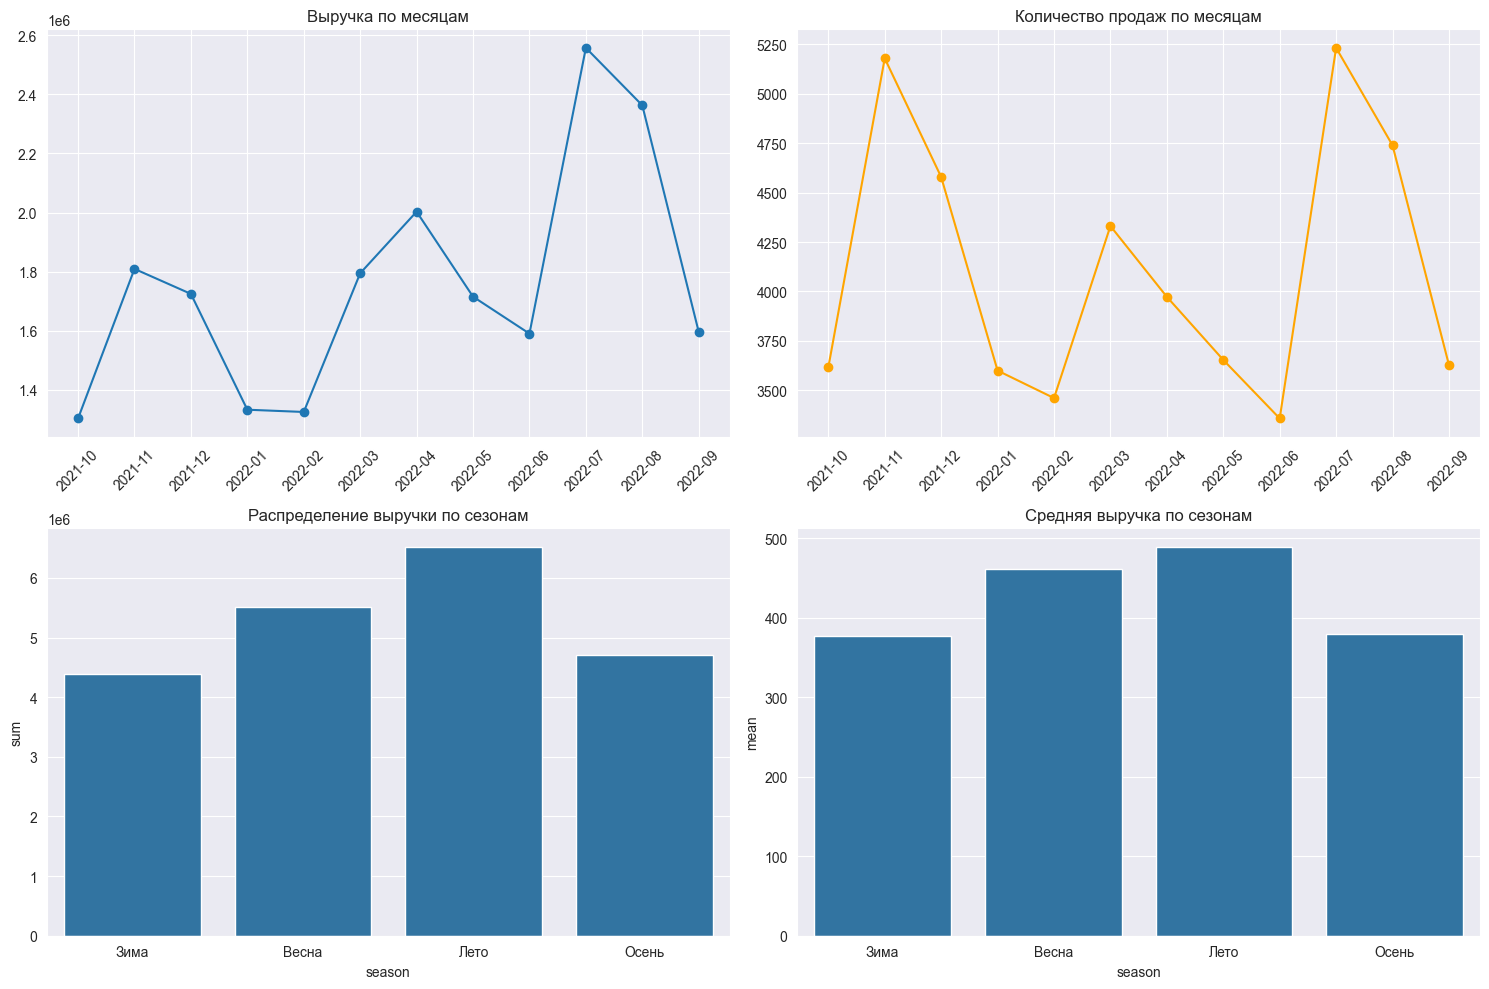

In [512]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df_year_month['year_month'], df_year_month['sum'], marker='o')
plt.title('Выручка по месяцам')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_year_month['year_month'], df_year_month['count'], marker='o', color='orange')
plt.title('Количество продаж по месяцам')
plt.xticks(rotation=45)
plt.grid(True)

# Боксплот по сезонам
plt.subplot(2, 2, 3)
sns.barplot(data=df_season, x='season', y='sum', order=['Зима', 'Весна', 'Лето', 'Осень'])
plt.title('Распределение выручки по сезонам')

plt.subplot(2, 2, 4)

sns.barplot(data=df_season, x='season', y='mean', order=['Зима', 'Весна', 'Лето', 'Осень'])
plt.title('Средняя выручка по сезонам')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

На основе построенных графиков можно сделать несколько выводов:
<ol>
    <li> Выручка и количество продаж демонстрируют сезонную зависимость, с пиками в летние месяцы и спадом в начале года.
    <li> Летний сезон является самым прибыльным среди всех сезонов, а также средняя цена за билет летом является самой высокой.
    <li> Общее снижение выручки к середине года и восстановление к концу периода может быть связано с внешними факторами или сезонными трендами.
<ol\>

In [523]:
coef = round(np.corrcoef(df_year_month['count'], df_year_month['sum'])[0, 1] * 100, 2)
print('Коэффициент Пирсона равен', coef, '%')

Коэффициент Пирсона равен 76.59 %


Такой высокий показатель говорит о том, что между выручкой и количеством продаж по месяцам существует сильная связь по шкале Чеддока. Это требует пристального внимания

In [524]:
from scipy.stats import jarque_bera
from scipy.stats import kstest
from scipy.stats import anderson

# Нулевая гипотеза: данные распределены нормально (p>0.05)
def normal_test(data):

    result_JB = (jarque_bera(data))
    print(f"JB statistic: {result_JB[0]}")
    print(f"p-value: {result_JB[1]}", end='\n\n')


    result_KS = (kstest(data, cdf='norm'))
    print(f"Kolmogorov-Smirnov statistic: {result_KS[0]}")
    print(f"p-value: {result_KS[1]}", end='\n\n')


    result_AD = (anderson(data, dist='norm'))
    print(f"Anderson-Darling statistic: {result_AD[0]}")
    print(f"Critical values: {result_AD[1]}")
    print(f"Significance levels: {result_AD[2]}")



In [555]:
# проверка гипотезы о различии выручки осенью и зимой
# H0: выручка от продаж осенью и зимой не отличается
autumn_sales = df[df['month'].isin([9, 10, 11])]['revenue_amount'].tolist()
winter_sales = df[df['month'].isin([12, 1, 2])]['revenue_amount'].tolist()

In [526]:
normal_test(autumn_sales)

JB statistic: 1666.785926514691
p-value: 0.0

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0

Anderson-Darling statistic: 161.76400138988902
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


In [527]:
normal_test(winter_sales)

JB statistic: 1622.886854787259
p-value: 0.0

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0

Anderson-Darling statistic: 156.96781448939691
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


Данные не являются нормально распределенными, поэтому нужно использовать непараметрические тесты для проверки гипотезы.<br>
В этом случае стоит использовать критерий Манна-Уитни

In [528]:
from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(autumn_sales, winter_sales, method="asymptotic")
alpha = 0.05

print('p-value:', round(p,3))
if p < alpha:
    print('Следует отвергнуть нулевую гипотезу: выручка осенью и зимой отличается.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: выручка осенью и зимой не отличается.')

p-value: 0.47
Не удалось отвергнуть нулевую гипотезу: выручка осенью и зимой не отличается.


## 2.4 Проверка гипотезы о том, что выручка от продажи билетов для этих двух групп клиентов отличается

In [529]:
# сделаем столбец с разницей между покупкой билета и отлетом
df['time_to_flight'] = (df['flight_date_loc'] - df['issue_date']).dt.days
df

C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\3143821972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_flight'] = (df['flight_date_loc'] - df['issue_date']).dt.days


,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season,time_to_flight,group
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0,12,2021,2021-12,Зима,35,medium
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0,12,2021,2021-12,Зима,3,late
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0,11,2021,2021-11,Осень,37,medium
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0,12,2021,2021-12,Зима,28,late
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0,12,2021,2021-12,Зима,35,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49823,2022-06-11,2022-06-22,CHD,MOW,OMS,ВВЛ,0,ONLINE,480.0,6,2022,2022-06,Лето,11,late
49824,2022-06-06,2022-06-20,AD,LED,MOW,ВВЛ,0,OFFLINE,270.0,6,2022,2022-06,Лето,14,late
49825,2022-06-26,2022-06-29,AD,MOW,KZN,ВВЛ,1,ONLINE,230.0,6,2022,2022-06,Лето,3,late
49826,2022-06-26,2022-06-28,AD,KZN,MOW,ВВЛ,0,OFFLINE,270.0,6,2022,2022-06,Лето,2,late


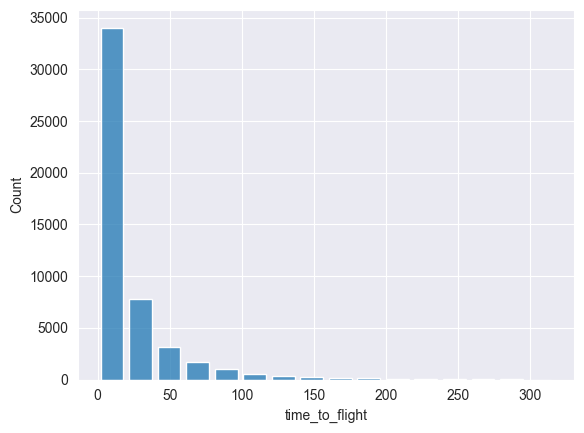

In [530]:
sns.histplot(df['time_to_flight'],  binwidth=20, shrink=.8)
plt.show()

In [531]:
# разделим на 3 группы основываясь на графике выше
def group(x):
    if x < 30:
        return 'late'
    elif x >= 30 and x < 90:
        return 'medium'
    else:
        return 'early'

df['group'] = df['time_to_flight'].apply(group)
df.sample(5)

C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\3596205703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['time_to_flight'].apply(group)


,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season,time_to_flight,group
15436,2022-09-16,2022-09-23,AD,LED,IKT,ВВЛ,1,ONLINE,470.0,9,2022,2022-09,Осень,7,late
16827,2022-04-07,2022-04-28,AD,OVB,KHV,ВВЛ,1,OFFLINE,660.0,4,2022,2022-04,Весна,21,late
42665,2022-01-21,2022-01-30,AD,PEE,MOW,ВВЛ,0,OFFLINE,310.0,1,2022,2022-01,Зима,9,late
5008,2022-01-03,2022-01-17,AD,OVB,MOW,ВВЛ,0,OFFLINE,370.0,1,2022,2022-01,Зима,14,late
28149,2022-08-17,2022-08-18,AD,TJM,OVB,ВВЛ,0,OFFLINE,460.0,8,2022,2022-08,Лето,1,late


In [532]:
# выручка и средняя цена по группам
sales_group = df.groupby('group').agg({'revenue_amount': {'sum', 'mean'}}).reset_index()
sales_group

group revenue_amount            
                     sum        mean
0   early   9.443396e+05  456.423190
1    late   1.657763e+07  424.197358
2  medium   3.593437e+06  438.170587

Из таблицы видно, что самую большую прибыль приносят билеты, купленные ближе к дате вылета.

In [533]:
#создадим отдельные датафреймы для каждой группы
df_early = df[df['group']=='early']['revenue_amount']
df_medium = df[df['group']=='medium']['revenue_amount']
df_late = df[df['group']=='late']['revenue_amount']

In [534]:
normal_test(df_early)

JB statistic: 33.007213827151986
p-value: 6.801028361472841e-08

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0

Anderson-Darling statistic: 2.511134274822325
Critical values: [0.575 0.655 0.785 0.916 1.09 ]
Significance levels: [15.  10.   5.   2.5  1. ]


In [535]:
normal_test(df_medium)

JB statistic: 345.15241564979016
p-value: 1.124877509921066e-75

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0

Anderson-Darling statistic: 29.5920388944578
Critical values: [0.576 0.656 0.787 0.918 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]


In [536]:
normal_test(df_late)

JB statistic: 3343.124253158503
p-value: 0.0

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0

Anderson-Darling statistic: 385.54298821082193
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


Из проведенных тестов можно увидеть, что все группы не имеют нормальное распределение, поэтому следует использовать для проверки гипотезы критерий Манна-Уитни (для 2 выборок) и Краскела-Уоллиса (больше 2 выборок).

In [537]:
from scipy.stats import mannwhitneyu
from itertools import combinations

all_df_group = [df_early, df_medium, df_late]
test_group = list(combinations(all_df_group, 2))


stat3, p = mannwhitneyu(df_early, df_late)


print('p-value', p)
if p < alpha:
    print('Следует отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early и late отличается.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early и late не отличается.')

p-value 3.768530092600156e-25
Следует отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early и late отличается.


In [538]:
from scipy.stats import kruskal


stat, p = kruskal(df_early, df_medium, df_late)


print('p-value', p)
if p < alpha:
    print('Следует отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early, medium, late отличается.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early, medium, late не отличается.')

p-value 2.883463825058589e-37
Следует отвергнуть нулевую гипотезу: выручка от продажи билетов для групп early, medium, late отличается.


## 2.5 Топ 10 популярных направления перелета

Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [539]:
df_air = pd.read_csv('airports.txt',  sep=',', header=None,
            names = ['airport', 'location', 'country', 'iata_code', 'icao_code', 'latitude', 'longitude', 'altitude',
                     'timezone', 'dst', 'timezone_region', 'type', 'source'])
df_air.head()

,airport,location,country,iata_code,icao_code,latitude,longitude,altitude,timezone,dst,timezone_region,type,source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


В городах бывают несколько аэропортов. Давайте проверим,

In [540]:
for i in df_air['location'].unique():
    if len(df_air[df_air['location'] == i]['iata_code'].unique()) > 1:
        print(i,":", df_air[df_air['location'] == i]['iata_code'].unique())
        print()

Winnipeg : ['\\N' 'YWG']

Halifax : ['\\N' 'YHZ']

Nanaimo : ['YCD' 'ZNA']

Deer Lake : ['YDF' 'YVZ']

Edmonton : ['YEG' 'YXD']

Eureka : ['YEU' 'EKA']

Kingston : ['YGK' 'KIN' 'KTP']

Geraldton : ['YGQ' 'GET']

Hamilton : ['YHM' 'HLZ' 'HLT' 'HAO' '\\N']

Montreal : ['YHU' 'YMX' 'YUL']

Stephenville : ['YJT' 'SEP']

Kamloops : ['YKA' 'AMN']

Waterloo : ['YKF' 'ALO']

Toronto : ['YKZ' 'YTZ' 'YYZ' 'YZD']

Ottawa : ['YOW' 'YRO' '\\N']

Peterborough : ['YPQ' '\\N']

Kenora : ['YQK' '\\N']

Sydney : ['YQY' 'BWU' 'SYD']

Fort Smith : ['YSM' 'FSM']

Trenton : ['YTR' 'TTN']

Vancouver : ['YVR' '\\N' 'CXH']

London : ['YXU' 'LTN' 'LGW' 'LCY' 'LHR' 'STN' '\\N' 'LOZ']

Whitehorse : ['YXY' '\\N']

Calgary : ['YYC' '\\N']

Charlottetown : ['YYG' '\\N']

Victoria : ['YYJ' 'YWH' 'VCT' 'ZIC' '\\N']

Port Hardy : ['YZT' '\\N']

Greenwood : ['YZX' 'GWO']

Faro : ['ZFA' 'FAO']

Oran : ['TAF' 'ORN' 'ORA']

San Pedro : ['SPY' 'SPR']

Berlin : ['SXF' 'THF' 'TXL']

Hamburg : ['HAM' 'XFW']

Essen : ['ESS' '\\

In [541]:
df.head()

,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season,time_to_flight,group
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0,12,2021,2021-12,Зима,35,medium
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0,12,2021,2021-12,Зима,3,late
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0,11,2021,2021-11,Осень,37,medium
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0,12,2021,2021-12,Зима,28,late
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0,12,2021,2021-12,Зима,35,medium


In [542]:
df = pd.merge(df, df_air[['iata_code', 'location']], left_on='dest_city_code', right_on='iata_code', how='left').drop('iata_code', axis=1)
df = pd.merge(df, df_air[['iata_code', 'location']], left_on='orig_city_code', right_on='iata_code', how='left').drop('iata_code', axis=1)
df.rename(columns={'location_x': 'dest_city', 'location_y': 'orig_city'}, inplace=True)
df.head()


,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season,time_to_flight,group,dest_city,orig_city
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0,12,2021,2021-12,Зима,35,medium,Kaliningrad,NaN
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0,12,2021,2021-12,Зима,3,late,Novosibirsk,Yuzhno-sakhalinsk
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0,11,2021,2021-11,Осень,37,medium,NaN,Kaliningrad
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0,12,2021,2021-12,Зима,28,late,NaN,Voronezh
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0,12,2021,2021-12,Зима,35,medium,Krasnodar,NaN


In [543]:
df.isnull().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
orig_city_code           0
dest_city_code           0
route_flight_type        0
ffp_flag                 0
sale_type                0
revenue_amount           0
month                    0
year                     0
year_month               0
season                   0
time_to_flight           0
group                    0
dest_city            16322
orig_city            16194
dtype: int64

In [544]:
undef_dest_city = set(df.query('dest_city.isnull()')['dest_city_code'].unique())
undef_orig_city = set(df.query('orig_city.isnull()')['orig_city_code'].unique())
undef_city = set.union(undef_dest_city, undef_orig_city)

print('Неопознанные коды городов прилета и вылета:', undef_city)

Неопознанные коды городов прилета и вылета: {'ROM', 'BAK', 'MOW', 'TYO', 'SEL', 'NQZ', 'OHH', 'GRV', 'TOX', 'LON', 'PAR', 'BER', 'MIL'}


После объединения у нас есть несколько позиций, в которых отсутствуют города для определенных кодов. Давайте создадим словарь и добавим вручную

In [545]:
add_codes = {
    'ROM': 'Rome',
    'BAK': 'Baku',
    'MOW': 'Moscow',
    'TYO': 'Tokyo',
    'SEL': 'Seoul',
    'NQZ': 'Nur-Sultan',
    'OHH': 'Okha',
    'GRV': 'Grozny',
    'TOX': 'Tobolsk',
    'LON': 'London',
    'PAR': 'Paris',
    'BER': 'Berlin',
    'MIL': 'Milan'
}


orig_codes = df[['orig_city_code', 'orig_city']].dropna().set_index('orig_city_code')['orig_city'].to_dict()
dest_codes = df[['dest_city_code', 'dest_city']].dropna().set_index('dest_city_code')['dest_city'].to_dict()

dict_all = add_codes | orig_codes | dest_codes

In [546]:
df['dest_city'] = df['dest_city_code'].map(dict_all)
df['orig_city'] = df['orig_city_code'].map(dict_all)
df

,issue_date,flight_date_loc,pax_type,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,revenue_amount,month,year,year_month,season,time_to_flight,group,dest_city,orig_city
0,2021-12-07,2022-01-11,AD,MOW,KGD,ВВЛ,0,ONLINE,200.0,12,2021,2021-12,Зима,35,medium,Kaliningrad,Moscow
1,2021-12-31,2022-01-03,AD,UUS,OVB,ВВЛ,0,OFFLINE,610.0,12,2021,2021-12,Зима,3,late,Novosibirsk,Yuzhno-sakhalinsk
2,2021-11-28,2022-01-04,AD,KGD,MOW,ВВЛ,1,ONLINE,390.0,11,2021,2021-11,Осень,37,medium,Moscow,Kaliningrad
3,2021-12-08,2022-01-05,AD,VOZ,MOW,ВВЛ,0,ONLINE,190.0,12,2021,2021-12,Зима,28,late,Moscow,Voronezh
4,2021-12-08,2022-01-12,AD,MOW,KRR,ВВЛ,1,OFFLINE,190.0,12,2021,2021-12,Зима,35,medium,Krasnodar,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49345,2022-06-11,2022-06-22,CHD,MOW,OMS,ВВЛ,0,ONLINE,480.0,6,2022,2022-06,Лето,11,late,Omsk,Moscow
49346,2022-06-06,2022-06-20,AD,LED,MOW,ВВЛ,0,OFFLINE,270.0,6,2022,2022-06,Лето,14,late,Moscow,St. Petersburg
49347,2022-06-26,2022-06-29,AD,MOW,KZN,ВВЛ,1,ONLINE,230.0,6,2022,2022-06,Лето,3,late,Kazan,Moscow
49348,2022-06-26,2022-06-28,AD,KZN,MOW,ВВЛ,0,OFFLINE,270.0,6,2022,2022-06,Лето,2,late,Moscow,Kazan


In [547]:
df.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
revenue_amount       0
month                0
year                 0
year_month           0
season               0
time_to_flight       0
group                0
dest_city            0
orig_city            0
dtype: int64

Больше пропущенных значений нет, поэтому перейдем к поиску 10 популярных направлений. Для этого создадим новый столбец orig_to_dest

In [549]:
# новая колонка orig_to_dest
df['orig_to_dest'] = df['orig_city']+'_'+df['dest_city']


#создадим два отдельных df для внутрених и международных рейсов
df_inside = df.query('route_flight_type == "ВВЛ"')
df_outside = df.query('route_flight_type == "МВЛ"')

In [550]:
df_inside = (df_inside.groupby('orig_to_dest')['revenue_amount']
          .sum().round(2)
          .reset_index()
          .sort_values(by='revenue_amount', ascending=False)
          .assign(weight=lambda x: (x.revenue_amount / x.revenue_amount.sum() * 100).round(2)))
df_inside.head(10)

,orig_to_dest,revenue_amount,weight
258,Sochi_Moscow,523390.35,2.72
139,Moscow_Sochi,494377.81,2.57
194,Novosibirsk_Moscow,466890.32,2.43
126,Moscow_Novosibirsk,445673.03,2.32
211,Novosibirsk_Sochi,397528.97,2.07
259,Sochi_Novosibirsk,361411.13,1.88
212,Novosibirsk_St. Petersburg,288191.57,1.50
262,St. Petersburg_Moscow,283861.06,1.48
140,Moscow_St. Petersburg,278085.20,1.45
264,St. Petersburg_Novosibirsk,267213.06,1.39


По таблице видно, что самые популярные направления на внутренних рейсах, откуда происходят вылеты и где производятся посадки, это Сочи, Москва, Новосибирск и Санкт-Петербург. Общая доля выручки данных направлений среди всех внутренних рейсов составляет около 20%. Самое прибыльное направление это Сочи-Москва (2.72%)

In [551]:
df_outside = (df_outside.groupby('orig_to_dest')['revenue_amount']
          .sum().round(2)
          .reset_index()
          .sort_values(by='revenue_amount', ascending=False)
          .assign(weight=lambda x: (x.revenue_amount / x.revenue_amount.sum() * 100).round(2)))
df_outside.head(10)

,orig_to_dest,revenue_amount,weight
98,Khudzhand_Moscow,97821.62,5.21
224,Osh_Moscow,80920.00,4.31
165,Moscow_Osh,69160.00,3.69
155,Moscow_Khudzhand,58750.00,3.13
226,Osh_Novosibirsk,57970.00,3.09
100,Khudzhand_Novosibirsk,57740.00,3.08
27,Bishkek_Novosibirsk,48300.00,2.57
208,Novosibirsk_Osh,47450.00,2.53
196,Novosibirsk_Bishkek,46980.00,2.50
136,Moscow_Antalya,39130.00,2.09


По таблице видно, что самые популярные направления на международных рейсах, откуда происходят вылеты и где производятся посадки, это Ош, Москва, Новосибирск, Худжанд, Бишкек, Анталья. Общая доля выручки данных направлений среди всех международных рейсов составляет около 32%. Самое прибыльное направление это Худжанд-Москва (5.21%)

## 2.6 Проверка влияния других факторов на выручку

In [552]:
#Отберем определенные признаки и переведем категориальные признаки в числовые

list_corr = ['issue_date', 'flight_date_loc', 'pax_type', 'route_flight_type','ffp_flag', 'sale_type', 'revenue_amount', 'time_to_flight']
df_new = df[list_corr]


le = LabelEncoder()

df_new[df_new.select_dtypes('object').columns] = df_new.select_dtypes('object').apply(LabelEncoder().fit_transform)
df_new.head(10)


C:\Users\Mi\AppData\Local\Temp\ipykernel_24876\1358445663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[df_new.select_dtypes('object').columns] = df_new.select_dtypes('object').apply(LabelEncoder().fit_transform)


,issue_date,flight_date_loc,pax_type,route_flight_type,ffp_flag,sale_type,revenue_amount,time_to_flight
0,2021-12-07,2022-01-11,0,0,0,1,200.0,35
1,2021-12-31,2022-01-03,0,0,0,0,610.0,3
2,2021-11-28,2022-01-04,0,0,1,1,390.0,37
3,2021-12-08,2022-01-05,0,0,0,1,190.0,28
4,2021-12-08,2022-01-12,0,0,1,0,190.0,35
5,2021-11-29,2022-01-14,0,1,0,1,250.0,46
6,2021-12-03,2022-01-06,0,0,1,1,200.0,34
7,2021-11-28,2022-01-07,1,0,1,1,70.0,40
8,2021-12-02,2022-01-10,1,0,1,1,490.0,39
9,2021-11-25,2022-01-03,0,0,0,1,280.0,39


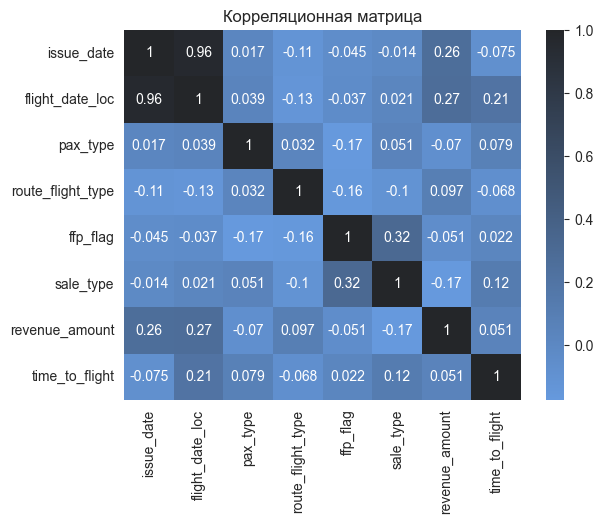

In [553]:
# вычисляем корреляционную матрицу
correlation_matrix = df_new.corr()

colormap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=colormap)

plt.title('Корреляционная матрица')
plt.show()

На основе построенной корреляционной матрицы мы можем утверждать, что выручка от продажи билетов по большей части зависит от даты покупки билета и даты вылета, хотя связь все равно остается очень слабой по шкале Чеддока. Остальные факторы почти не коррелируют с выручкой.